<a href="https://colab.research.google.com/github/reubence/IPYNB-Notebooks/blob/master/Pycaret_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pycaret

In [0]:
import pandas as pd

In [7]:
df = pd.read_csv('/content/hotel_bookings.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
from pycaret.classification import *

In [9]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58885,City Hotel,1,605,2016,October,43,17,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0.0,Transient,60.0,0.0,0.0,Canceled,2016-09-20
58886,City Hotel,1,605,2016,October,43,17,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0.0,Transient,60.0,0.0,0.0,Canceled,2016-09-20
58887,City Hotel,1,605,2016,October,43,17,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0.0,Transient,60.0,0.0,0.0,Canceled,2016-09-20
58888,City Hotel,1,605,2016,October,43,17,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0.0,Transient,60.0,0.0,0.0,Canceled,2016-09-20


In [12]:
df_setup = setup(data = df , target = "arrival_date_month" )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8762
1,Target Type,Multiclass
2,Label Encoded,"April: 0, August: 1, December: 2, February: 3, January: 4, July: 5, June: 6, March: 7, May: 8, November: 9, October: 10, September: 11"
3,Original Data,"(58890, 32)"
4,Missing Values,True
5,Numeric Features,8
6,Categorical Features,21
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
compare_models(fold= 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1,CatBoost Classifier,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2,Gradient Boosting Classifier,0.999900,0.000000,0.999900,0.999900,0.999900,0.999900
3,Extreme Gradient Boosting,0.999900,0.000000,0.999900,0.999900,0.999900,0.999900
4,Decision Tree Classifier,0.997500,0.000000,0.997000,0.997500,0.997500,0.997200
5,Ada Boost Classifier,0.964000,0.000000,0.967800,0.964400,0.964000,0.960400
6,Random Forest Classifier,0.922900,0.000000,0.924200,0.923900,0.922800,0.915100
7,Extra Trees Classifier,0.845700,0.000000,0.852800,0.847200,0.845800,0.830100
8,Logistic Regression,0.695500,0.000000,0.722100,0.701700,0.697300,0.665000
9,Linear Discriminant Analysis,0.647900,0.000000,0.673100,0.655100,0.647100,0.613900


In [17]:
mod = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0,1.0
3,1.0,0.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,1.0
5,1.0,0.0,1.0,1.0,1.0,1.0
6,1.0,0.0,1.0,1.0,1.0,1.0
7,1.0,0.0,1.0,1.0,1.0,1.0
8,1.0,0.0,1.0,1.0,1.0,1.0
9,1.0,0.0,1.0,1.0,1.0,1.0


In [21]:
tuned_mod = tune_model("lightgbm",optimize = "Prec")


SystemExit: ignored

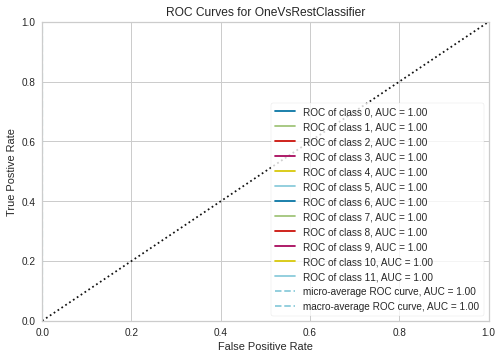

In [22]:
plot_model(mod, plot = "auc")

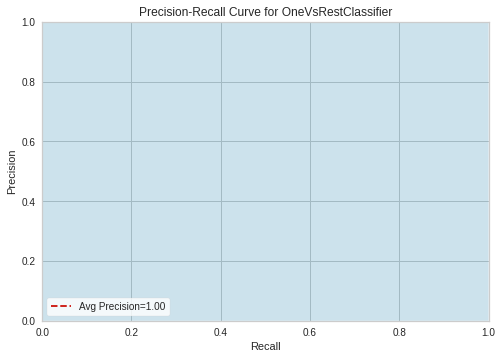

In [23]:
plot_model(mod, plot = "pr")

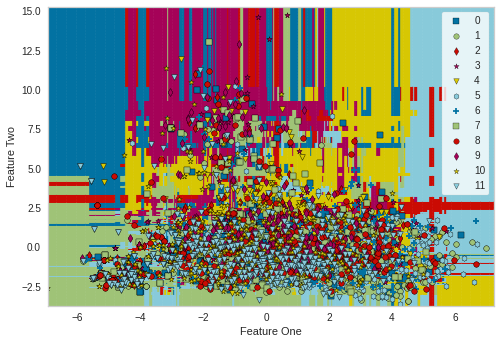

In [24]:
plot_model(mod, plot = "boundary")

In [27]:
plot_model(mod, plot = "feature")

SystemExit: ignored

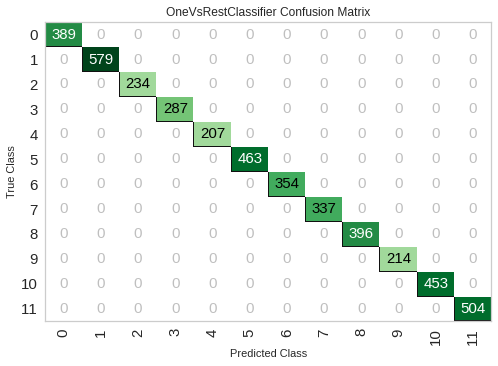

In [26]:
plot_model(mod, plot = "confusion_matrix")

In [29]:
predict_model(mod)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,1.0,0,1.0,1.0,1.0,1.0


,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,agent,days_in_waiting_list,adr,hotel_Resort Hotel,stays_in_weekend_nights_0,stays_in_weekend_nights_1,stays_in_weekend_nights_10,stays_in_weekend_nights_12,stays_in_weekend_nights_13,stays_in_weekend_nights_14,stays_in_weekend_nights_16,stays_in_weekend_nights_18,stays_in_weekend_nights_19,stays_in_weekend_nights_2,stays_in_weekend_nights_3,stays_in_weekend_nights_4,stays_in_weekend_nights_5,stays_in_weekend_nights_6,stays_in_weekend_nights_7,stays_in_weekend_nights_8,stays_in_weekend_nights_9,adults_0,adults_1,adults_10,adults_2,adults_20,adults_26,adults_27,adults_3,adults_4,adults_40,adults_5,adults_50,adults_55,adults_6,...,required_car_parking_spaces_8.0,total_of_special_requests_0.0,total_of_special_requests_1.0,total_of_special_requests_2.0,total_of_special_requests_3.0,total_of_special_requests_4.0,total_of_special_requests_5.0,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,arrival_date_year_month_1,arrival_date_year_weekday_3,arrival_date_year_weekday_4,arrival_date_year_weekday_6,arrival_date_year_is_month_end_0,arrival_date_year_is_month_start_1,reservation_status_date_month_1,reservation_status_date_month_10,reservation_status_date_month_11,reservation_status_date_month_12,reservation_status_date_month_2,reservation_status_date_month_3,reservation_status_date_month_4,reservation_status_date_month_5,reservation_status_date_month_6,reservation_status_date_month_7,reservation_status_date_month_8,reservation_status_date_month_9,reservation_status_date_weekday_0,reservation_status_date_weekday_1,reservation_status_date_weekday_2,reservation_status_date_weekday_3,reservation_status_date_weekday_4,reservation_status_date_weekday_5,reservation_status_date_weekday_6,reservation_status_date_is_month_end_1,reservation_status_date_is_month_start_0,arrival_date_month,Label,Score
0,34.0,4.0,21.0,3.0,0.0,240.00000,0.0,44.80,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4,4,1.0000
1,54.0,35.0,24.0,5.0,0.0,146.98131,0.0,196.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1.0000
2,10.0,8.0,24.0,2.0,0.0,250.00000,0.0,60.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3,3,1.0000
3,4.0,21.0,22.0,2.0,0.0,240.00000,0.0,110.00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8,8,1.0000
4,162.0,10.0,4.0,15.0,0.0,96.00000,0.0,82.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7,7,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,35.0,2.0,11.0,2.0,0.0,240.00

In [0]:
final_mod = finalize_model(mod)

In [31]:
final_mod

OneVsRestClassifier(estimator=LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=8762, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=True,
                                             subsample=1.0,
                                             subsample_for_bin=200000,
                   

In [33]:
interpret_model(mod)

SystemExit: ignored

In [34]:
save_model(mod , 'name_model')

Transformation Pipeline and Model Succesfully Saved


In [0]:
load_mod = load_model('name_model')

In [35]:
evaluate_model(mod)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…